# Avis

Pour faire fonctionner ce notebook, vous devez avoir préalablement installé le package simgen-creei et avoir obtenu le fichier .csv de la BDSPS.

# Choix des paramètres d'utilisation

### Chemin d'accès et le nom du fichier de la BDSPS

Modifiez le chemin d'accès ci-dessous (et le nom au besoin) pour qu'il corresponde à l'endroit où vous avez enregistré le fichier .csv de la BDSPS fourni par l'équipe CREEi (bdsps2017_slice.csv).

In [1]:
donnees_brutes = '.../Desktop/bdsps2017_slice.csv'

### Année de fin 
 - valeurs possibles : 2018 à 2100

In [2]:
annee_fin = 2050

### Nombre de réplications 
- valeurs possibles : 1 à 200

In [3]:
nb_rep = 1

### Hypothèses du modèle

       

#### Fécondité

Choix :
- weak (faible)
- reference (moyenne)
- strong (élevée)

In [4]:
fecondite = 'reference'

#### Mortalité


Choix :
- low (faible)
- medium (moyen)
- high (élevé)

In [5]:
mortalite = 'low'

#### Immigration

- valeurs possibles : 0 à 1

**Taux prospectif d'immigration internationnale**

(une valeur de 0,0066 corresponds à 55 000 nouveaux immigrants en 2017 sur une population de 8 302 063).

In [6]:
taux_immigration = 0.0066

# Initialisation du modèle

## Importation des packages

In [7]:
import warnings
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

## Importation des fonctions et des classes de SIMGEN

Si vous avez utilisé l'installation manuelle, vous devez ajouter dans une cellule ci-dessous le code suivant:

import sys
sys.path.append('.../packages')

où '.../packages' correspond au chemin d'accès du dossier où vous avez sauvegardé le package *simgen*.

In [8]:
import simgen
from simgen import model, formating

## Formattage données de départ

La fonction ***bdsps_format***  transforme la BDSPS de Statistique Canada afin de mettre en forme certaines variables et créer les registres des individus (dominants, conjoints et enfants). Cette fonction calibre également les poids des répondants, par âge et sexe, afin de s’arrimer à la population québécoise de 2017, selon l’ISQ.

In [9]:
preparation_data=formating()
preparation_data.bdsps_format(donnees_brutes)

## Création de l'instance du modèle

In [10]:
base = model(stop_yr=(annee_fin-1))

## Chargement des principaux intrants 

- Base de données de départ

In [11]:
base.startpop('start_pop')

- Hypothèse de fécondité

In [13]:
base.birth_assumptions(scenario=fecondite)

- Hypothèse de mortalité

In [14]:
base.dead_assumptions(scenario=mortalite)

- Base de données à partir de laquelle les immigrants sont sélectionnés

In [12]:
base.immig_assumptions(init='imm_pop', num=taux_immigration)

# Lancement de la simulation

In [15]:
base.simulate(rep=nb_rep)

# Affichage des résultats

Le paramètre *annee_debut_affi* sert d'année de départ pour l'affichage des résultats. Cette valeur doit être supérieure ou égale à 2017 et inférieure à l'année de fin.

In [16]:
annee_debut_affi = 2020

## Taille de la population

Calcul des fréquences pour la population totale

In [17]:
pop = base.stats.freq()

Affichage du graphique

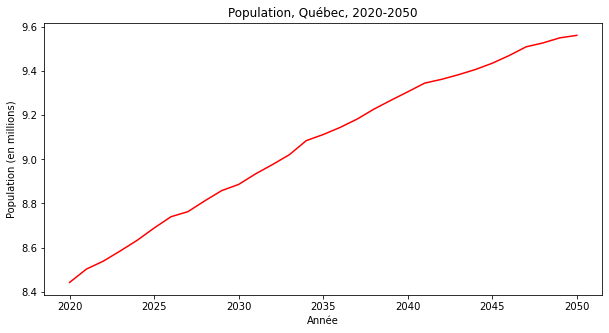

In [18]:
plt.figure(figsize=(10,5))
plt.plot(pop.loc[annee_debut_affi:]/1e6, color='red')
plt.title('Population, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.ylabel('Population (en millions)')
plt.xlabel('Année')
plt.show()

Production du tableau

In [19]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['Fréquence'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut
    table.iloc[i,0] = round(pop[j]/1e6,1)
else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['Fréquence'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i

    table.iloc[i,0] = round(pop[j]/1e6,1)

Affichage tableau

In [20]:
table

,Fréquence
2020,8.4
2030,8.9
2040,9.3
2050,9.6


### Selon le sexe

Calcul des fréquences selon le sexe

In [21]:
pop_m=base.stats.freq(sub='male==True')
pop_f=base.stats.freq(sub='male==False')

Affichage du graphique

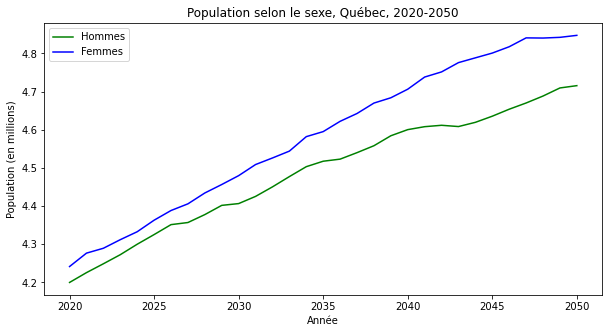

In [22]:
plt.figure(figsize=(10,5))
plt.plot(pop_m.loc[annee_debut_affi:]/1e6, label='Hommes', color='green')
plt.plot(pop_f.loc[annee_debut_affi:]/1e6, label='Femmes', color='blue')
plt.legend()
plt.xlabel('Année')
plt.ylabel('Population (en millions)')
plt.title('Population selon le sexe, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.show()

Production du tableau

In [23]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['Hommes', 'Femmes'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut

    table.iloc[i,0] = round(pop_m[j]/1e6,1)
    table.iloc[i,1] = round(pop_f[j]/1e6,1)
else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['Hommes', 'Femmes'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i

    table.iloc[i,0] = round(pop_m[j]/1e6,1)
    table.iloc[i,1] = round(pop_f[j]/1e6,1)

Affichage tableau

In [24]:
table

,Hommes,Femmes
2020,4.2,4.2
2030,4.4,4.5
2040,4.6,4.7
2050,4.7,4.8


### Selon le groupe d'âge

Calcul des fréquences par groupe d'âge (moins de 25 ans, 25 à 64 ans, 65 et plus)

In [25]:
pop_0_24=base.stats.freq(sub='age<25')
pop_25_64=base.stats.freq(sub='age>24 and age<65')
pop_65_plus=base.stats.freq(sub='age>64')

Affichage du graphique

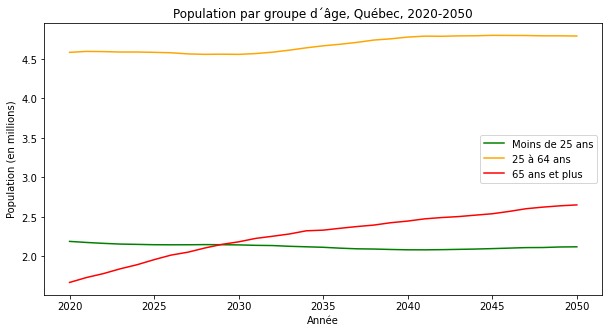

In [26]:
plt.figure(figsize=(10,5))
plt.plot(pop_0_24.loc[annee_debut_affi:]/1e6, label='Moins de 25 ans', color='green')
plt.plot(pop_25_64.loc[annee_debut_affi:]/1e6, label='25 à 64 ans', color='orange')
plt.plot(pop_65_plus.loc[annee_debut_affi:]/1e6, label='65 ans et plus', color='red')
plt.legend()
plt.ylabel('Population (en millions)')
plt.xlabel('Année')
plt.title('Population par groupe d´âge, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.show()

Production du tableau

In [27]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['Moins de 25 ans', '25 à 64 ans','65 ans et plus'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut

    table.iloc[i,0] = round(pop_0_24[j]/1e6,1)
    table.iloc[i,1] = round(pop_25_64[j]/1e6,1)
    table.iloc[i,2] = round(pop_65_plus[j]/1e6,1)
else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['Moins de 25 ans', '25 à 64 ans','65 ans et plus'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i

    table.iloc[i,0] = round(pop_0_24[j]/1e6,1)
    table.iloc[i,1] = round(pop_25_64[j]/1e6,1)
    table.iloc[i,2] = round(pop_65_plus[j]/1e6,1)

Affichage tableau

In [28]:
table

,Moins de 25 ans,25 à 64 ans,65 ans et plus
2020,2.2,4.6,1.7
2030,2.1,4.6,2.2
2040,2.1,4.8,2.4
2050,2.1,4.8,2.7


### Selon la tranche d'âge

Calcul des fréquences par âge

In [29]:
baset=base.stats.freq('age').T

Année de la première série

In [30]:
annee_serie1 = annee_debut_affi

Année de la deuxième série

In [31]:
annee_serie2 = annee_fin

Affichage du graphique

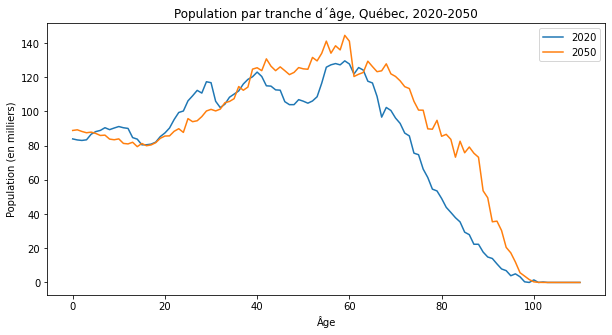

In [32]:
plt.figure(figsize=(10,5))
plt.plot(baset[[annee_serie1]]/1000,label=str(annee_serie1))
plt.plot(baset[[annee_serie2]]/1000,label=str(annee_serie2))
plt.ylabel('Population (en milliers)')
plt.xlabel('Âge')
plt.legend()
plt.title('Population par tranche d´âge, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.show()

Production du tableau

In [33]:
table = pd.DataFrame(index=['0 ans','20 ans','40 ans', '60 ans','80 ans'], columns=[str(annee_serie1), str(annee_serie2)])

for i in range(0,5):
  j = i*20
  table.iloc[i,0] = round(baset[annee_serie1].loc[j]/1000,1)
  table.iloc[i,1] = round(baset[annee_serie2].loc[j]/1000,1)

Affichage tableau

In [34]:
table

,2020,2050
0 ans,83.9,88.8
20 ans,87.4,85.6
40 ans,123,125.5
60 ans,127.7,141
80 ans,49.1,85.4


## Niveau de scolarité

Calcul des proportions par niveau de scolarité des individus de 25 à 64 ans

In [35]:
prop_educ = base.stats.prop('educ', sub="age>=25 and age<=64 and insch==False")

Affichage du graphique

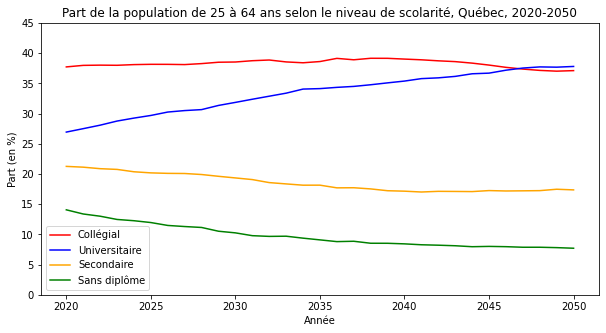

In [36]:
plt.figure(figsize=(10,5))
plt.plot(prop_educ['dec'].loc[annee_debut_affi:]*100, label='Collégial', color='red')
plt.plot(prop_educ['uni'].loc[annee_debut_affi:]*100, label='Universitaire', color='blue')
plt.plot(prop_educ['des'].loc[annee_debut_affi:]*100, label='Secondaire', color='orange')
plt.plot(prop_educ['none'].loc[annee_debut_affi:]*100, label='Sans diplôme', color='green')
plt.ylim(0, 45)
plt.legend()
plt.ylabel('Part (en %)')
plt.xlabel('Année')
plt.title('Part de la population de 25 à 64 ans selon le niveau de scolarité, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.show()

Production du tableau

In [37]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['Sans diplôme','Secondaire','Collégial','Universitaire'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut

    table.iloc[i,0] = round(prop_educ['none'].loc[j]*100,1)
    table.iloc[i,1] = round(prop_educ['des'].loc[j]*100,1)
    table.iloc[i,2] = round(prop_educ['dec'].loc[j]*100,1)
    table.iloc[i,3] = round(prop_educ['uni'].loc[j]*100,1)
    
else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['Sans diplôme','Secondaire','Collégial','Universitaire'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i
    
    table.iloc[i,0] = round(prop_educ['none'].loc[j]*100,1)
    table.iloc[i,1] = round(prop_educ['des'].loc[j]*100,1)
    table.iloc[i,2] = round(prop_educ['dec'].loc[j]*100,1)
    table.iloc[i,3] = round(prop_educ['uni'].loc[j]*100,1)

Affichage tableau

In [38]:
table

,Sans diplôme,Secondaire,Collégial,Universitaire
2020,14.1,21.3,37.7,26.9
2030,10.3,19.3,38.5,31.9
2040,8.4,17.2,39,35.4
2050,7.7,17.4,37.1,37.8


## Personnes en couple

Calcul de la proportion des personnes en couple auprès les 25 ans et plus

In [39]:
propms15plus = base.stats.prop('married', sub="age>=15")

Affichage du graphique

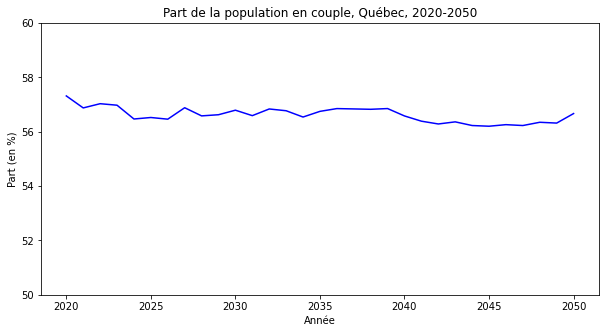

In [40]:
plt.figure(figsize=(10,5))
plt.plot(propms15plus[True].loc[annee_debut_affi:]*100, color='blue')
plt.ylim(50, 60)
plt.title('Part de la population en couple, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.ylabel('Part (en %)')
plt.xlabel('Année')
plt.show()

Production du tableau

In [41]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['Part (en %)'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut
    
    table.iloc[i,0] = round(propms15plus[True].loc[j]*100,1)

else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['Part (en %)'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i

    table.iloc[i,0] = round(propms15plus[True].loc[j]*100,1)


Affichage tableau

In [42]:
table

,Part (en %)
2020,57.3
2030,56.8
2040,56.6
2050,56.7


### Selon le groupe d'âge

Calcul des proportions selon le groupe d'âge (20 à 44 ans, 45 à 64 ans, 65 et plus)

In [43]:
propms18_44 = base.stats.prop('married', sub="age>=18 and age<=44")
propms45_64 = base.stats.prop('married', sub="age>=45 and age<=64")
propms65_plus = base.stats.prop('married', sub="age>=65")

Affichage du graphique

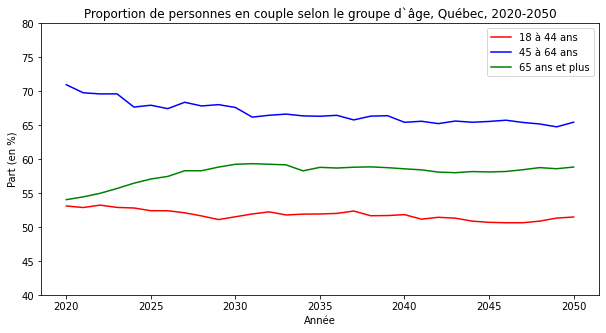

In [44]:
plt.figure(figsize=(10,5))
plt.plot(propms18_44[True].loc[annee_debut_affi:]*100, label='18 à 44 ans', color='red')
plt.plot(propms45_64[True].loc[annee_debut_affi:]*100, label='45 à 64 ans', color='blue')
plt.plot(propms65_plus[True].loc[annee_debut_affi:]*100, label='65 ans et plus', color='green')
plt.ylim(40, 80)
plt.ylabel('Part (en %)')
plt.xlabel('Année')
plt.legend()
plt.title('Proportion de personnes en couple selon le groupe d`âge, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.show()

Production du tableau

In [45]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['18 à 44 ans', '45 à 64 ans','65 ans et plus'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut
    
    table.iloc[i,0] = round(propms18_44[True].loc[j]*100,1)
    table.iloc[i,1] = round(propms45_64[True].loc[j]*100,1)
    table.iloc[i,2] = round(propms65_plus[True].loc[j]*100,1)
else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['18 à 44 ans', '45 à 64 ans','65 ans et plus'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i

    table.iloc[i,0] = round(propms18_44[True].loc[j]*100,1)
    table.iloc[i,1] = round(propms45_64[True].loc[j]*100,1)
    table.iloc[i,2] = round(propms65_plus[True].loc[j]*100,1)

Affichage tableau

In [46]:
table

,18 à 44 ans,45 à 64 ans,65 ans et plus
2020,53.1,70.9,54
2030,51.5,67.6,59.2
2040,51.8,65.4,58.5
2050,51.4,65.4,58.8


## Nombre d'enfants

In [47]:
prop_enfant = base.stats.prop('nkids', sub="age>=18 and age<=54")

Affichage du graphiques

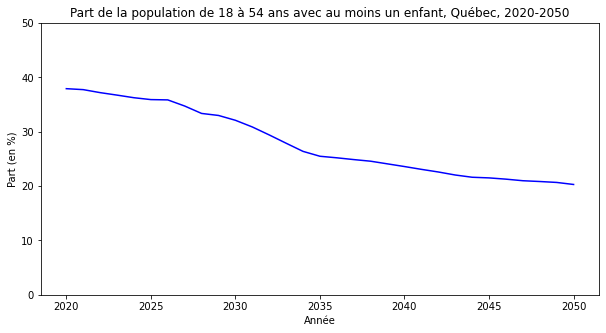

In [48]:
plt.figure(figsize=(10,5))
plt.plot(100-prop_enfant.loc[annee_debut_affi:,0]*100, color='blue')
plt.ylim(0, 50)
plt.ylabel('Part (en %)')
plt.xlabel('Année')
plt.title('Part de la population de 18 à 54 ans avec au moins un enfant, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.show()

Production du tableau

In [49]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['Part (en %)'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut

    table.iloc[i,0] = round((1-prop_enfant.loc[j,0])*100,1)
else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['Part (en %)'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i
    
    table.iloc[i,0] = round((1-prop_enfant.loc[j,0])*100,1)

Affichage tableau

In [50]:
table

,Part (en %)
2020,37.9
2030,32.1
2040,23.6
2050,20.3


Affichage du graphiques

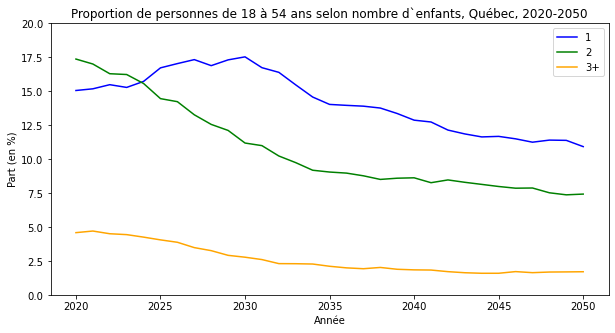

In [51]:
plt.figure(figsize=(10,5))
plt.plot(prop_enfant.loc[annee_debut_affi:,1]*100, label='1', color='blue')
plt.plot(prop_enfant.loc[annee_debut_affi:,2]*100, label='2', color='green')
plt.plot(prop_enfant.loc[annee_debut_affi:,3]*100, label='3+', color='orange')
plt.ylim(0, 20)
plt.ylabel('Part (en %)')
plt.xlabel('Année')
plt.legend()
plt.title('Proportion de personnes de 18 à 54 ans selon nombre d`enfants, Québec, '+str(annee_debut_affi)+'-'+str(annee_fin))
plt.show()

Production du tableau

In [52]:
saut = int((len(pop.loc[annee_debut_affi:])-1)/3)

if len(pop)>=5:
  table_annee = {1:annee_debut_affi,2:(annee_debut_affi+saut),3:(annee_debut_affi+2*saut),4:(annee_debut_affi+3*saut)}

  table = pd.DataFrame(index=[str(table_annee[1]),str(table_annee[2]),str(table_annee[3]), str(table_annee[4])], columns=['1 enfant', '2 enfants','3 enfants'])

  for i in range(0,4):
    j = annee_debut_affi + i*saut
    
    table.iloc[i,0] = round(prop_enfant.loc[j,1]*100,1)
    table.iloc[i,1] = round(prop_enfant.loc[j,2]*100,1)
    table.iloc[i,2] = round(prop_enfant.loc[j,3]*100,1)
else:
  table = pd.DataFrame(index=[str(annee_debut_affi),str(annee_debut_affi+1),str(annee_debut_affi+2), str(annee_debut_affi+3), str(annee_debut_affi+4)], columns=['1 enfant', '2 enfants','3 enfants'])

  for i in range(0,(len(pop))):
    j = annee_debut_affi + i

    table.iloc[i,0] = round(prop_enfant.loc[j,1]*100,1)
    table.iloc[i,1] = round(prop_enfant.loc[j,2]*100,1)
    table.iloc[i,2] = round(prop_enfant.loc[j,3]*100,1)

Affichage tableau

In [53]:
table

,1 enfant,2 enfants,3 enfants
2020,15,17.3,4.6
2030,17.5,11.2,2.8
2040,12.9,8.6,1.8
2050,10.9,7.4,1.7
